# Module 3 - Statistics with python
---------------------------------------------------

# Table of Content <a id='toc'></a>

<br>

1. **[SciPy.stats and statistics in python](#stats)**  
    1.1 [manipulation of random distributions](#stats.1)  
     1.1.1 [Drawing some random numbers : rvs](#stats.1.1)  
     1.1.2 [Looking up the quantiles and probability density functions](#stats.1.2)  
    1.2 [t-test](#stats.2)  
    1.3 [statistical power calculations](#stats.3)  
    1.4 [Multiple hypothesis testing](#stats.4)  
    1.5 [Fisher's exact test and the Chi-square test](#stats.5)  
    1.6 [1-way anova](#stats.6)  
    <br>

2. **[Correlation and linear regression](#reg)**  
    2.1 [Correlation](#reg.1)  
    2.2 [Regression](#reg.2)  
    <br>

<br>

## Introduction

This notebook aims to present how to perform classical statistical procedure as well as some amount of regression using various python libraries, such as **`scipy`**.

It **does not aim to replace a course on statistics**, but rather focuses on the code aspect.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import numpy as np
import statsmodels
from IPython.display import Image

print("All libraries imported successfully!")

All libraries imported successfully!


> Note: if you are missing some of the above modules, you should install them.
>
>    * Installation with **pip**: `pip install --user matplotlib seaborn scipy pandas numpy statsmodels` 
>    * Installation with **conda**: `conda install -c conda-forge matplotlib seaborn scipy pandas numpy statsmodels`

<br>

Making the plotted labels a bit bigger for presentation with a projector... you do **not need to run this cell**.

In [2]:
import matplotlib as mpl

font = {
    "family": "DejaVu Sans",
    "weight": "bold",
    "size"  : 20
}
mpl.rc("font", **font)

<br>
<br>

# 1. `scipy.stats` and statistics in python <a id='stats'></a>
-----------------------------------------------------------

**[SciPy](https://scipy.org)** is a comprehensive project for scientific python programming, regrouping a [library](https://docs.scipy.org/doc/scipy/reference/) and implementing various tools and algorithm for scientific computation.

This section gives a primer on the **`scipy.stats`** library, which provides ways to interact with various random distribution functions, and implements numerous statistical tests.

<br>


## 1.1 manipulation of random distributions <a id='stats.1'></a>

The **`scipy.stats`** module implements utilities for a large number of continuous and discrete distributions:

In [3]:
from scipy import stats

dist_continu = [d for d in dir(stats) if isinstance(getattr(stats, d), stats.rv_continuous)]
dist_discrete = [d for d in dir(stats) if isinstance(getattr(stats, d), stats.rv_discrete)]
print("Number of continuous distributions: %d" % len(dist_continu))
print("Number of discrete distributions:   %d" % len(dist_discrete))


Number of continuous distributions: 110
Number of discrete distributions:   21


Let's experiment with the normal distribution, or **`norm`** in `scipy.stats`

A look at `help(stats.norm)` tells us that:
* The **`loc`** argument (location) specifies the **mean** of the distribution.
* The **`scale`** argument specifies the **standard deviation** of the distribution.

<br>

**Example:** generate a specific normal distribution with a mean of 10 and a stdev of 2.

In [4]:
N = stats.norm(loc=10, scale=2)

# The mean and variance of a distribution can be retrieved using the .stats method:
print("Type of N is:", type(N))
print("Mean and variance of distribution:", N.stats())


Type of N is: <class 'scipy.stats._distn_infrastructure.rv_continuous_frozen'>
Mean and variance of distribution: (np.float64(10.0), np.float64(4.0))


In [5]:
help(N.stats)

Help on method stats in module scipy.stats._distn_infrastructure:

stats(moments='mv') method of scipy.stats._distn_infrastructure.rv_continuous_frozen instance



The scipy distribution object (`N` in our example) can then be used to interact with the distribution in many ways, as illustrated below.

<br>

### 1.1.1. Drawing random numbers: `rvs` <a id='stats.1.1'></a>

The **`rvs()`** method allows to draw a random number of values from a distribution.
* The `size` argument can be an integer or a sequence of several integers, this defines the
  dimensions of the returned arrays of random numbers.

In [6]:
# Get a sample of 10 random numbers, returned as a 1-dimensional array.
N.rvs(size=10)

array([10.59693053,  7.63417481,  8.44501188,  9.49700888, 10.34649588,
       12.04615363,  9.8042295 , 10.97630779,  8.40010548,  5.67570115])

In [7]:
# Get a sample of 10 random numbers, returned as a 2-dimensional array (5 rows, 2 cols).
N.rvs(size=(5, 2)) 

array([[10.16780948,  8.76406007],
       [ 8.28312391,  9.82170693],
       [10.53276481,  8.39225676],
       [ 5.69223633,  7.69110322],
       [10.79565377, 10.9075588 ]])

(array([  13.,  100.,  298.,  801., 1157., 1260.,  882.,  371.,  102.,
          16.]),
 array([ 3.32299564,  4.63347735,  5.94395907,  7.25444078,  8.5649225 ,
         9.87540421, 11.18588593, 12.49636765, 13.80684936, 15.11733108,
        16.42781279]),
 <BarContainer object of 10 artists>)

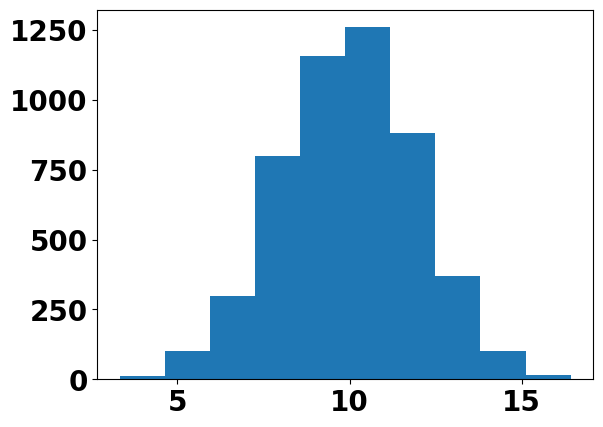

In [8]:
# Draw 5000 random numbers from the distribution and plot them.
plt.hist(N.rvs(size=5000)) 

<div class="alert alert-block alert-warning">
    
**Warning:** as with any drawing of random variable on a computer, [one merely emulates randomness](https://en.wikipedia.org/wiki/Pseudorandom_number_generator).  

<div>

The positive aspect of using pseudo-random numbers is that one can make random operation reproducible by setting up **random seed**.

In [9]:
import numpy as np

# Set the random seed and draw 5 random numbers:
np.random.seed(2023)   
draw1 = N.rvs(size=5)

# Set the random seed back to the same value as above -> 2021.
np.random.seed(2023)
draw2 = N.rvs(size=5)

print("Are the random draws equal?", all(draw1 == draw2))
print(draw1)
print(draw2)

Are the random draws equal? True
[11.42334706  9.35103009  7.99625872 10.47250159  9.79568032]
[11.42334706  9.35103009  7.99625872 10.47250159  9.79568032]


<br>

### 1.1.2 Looking-up quantiles and probability density functions <a id='stats.1.2'></a>

* **`pdf()`: Probability Density Function** - the probability that a random number has a value equal
  (or close to) the value passed to the function.
* **`cdf()`: Cumulative Distribution Function** - the probability that a random number has a value lower or 
  equal to the value passed to the function.
* **`ppf()`: Percent Point Function** (inverse of CDF) - gives the quantiles of the distribution.

<br>

**Example:** using the PDF to plot a distribution.

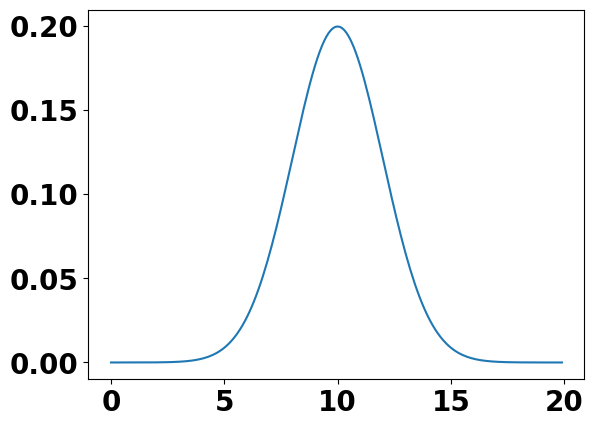

In [10]:
import matplotlib.pyplot as plt 

X = np.arange(0, 20, 0.1)      # Generate a sequence ranging from 0 to 20 with increment of 0.1
plt.plot(X, N.pdf(X))          # For each element of the sequence, get the associated PDF value.
plt.show()

<br>

**Example:** using the CDF to estimate a probability, using PPF to compute quantiles.

In [11]:
# cdf: Cumulative Distribution Function.
print('What is the probability of drawing a number <= 15.0 ?', N.cdf(15.0))

# ppf: gives the quantiles of the distribution.
P = [0.025, 0.5, 0.975]
Q = N.ppf(P)
print('Quantiles:', P, '->', Q)

What is the probability of drawing a number <= 15.0 ? 0.9937903346742238
Quantiles: [0.025, 0.5, 0.975] -> [ 6.08007203 10.         13.91992797]


<br>

For **discrete distribution** these rules change a bit: `pdf()` is replaced by `pmf()`.

Let's see an example of **binomial distribution** with 10 draws and a 0.5 probability of success:

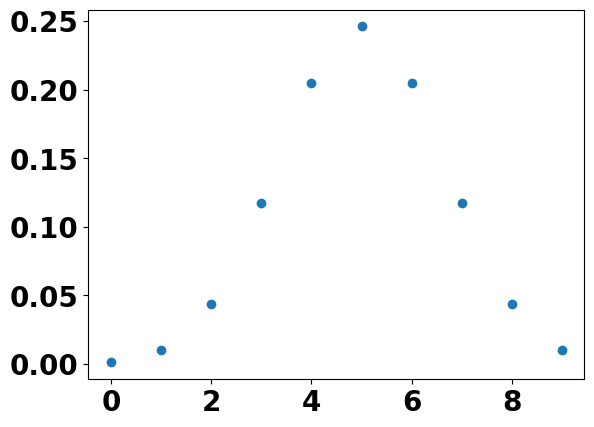

In [12]:
X = np.arange(0,10)   # Generate a sequence of integer number from 0 to 9.
plt.scatter(X, stats.binom.pmf(X, n=10, p=0.5))
plt.show()

Most distributions have a certain number of **parameters** which control their overall **shape, location or scale**.
* The **normal distribution** e.g. has two parameters: its mean ($\mu$) and its standard deviation ($\sigma$), 
  which respectively control its location and scale. In `scipy`, these are set via the `loc` (location)
  and `scale` arguments.

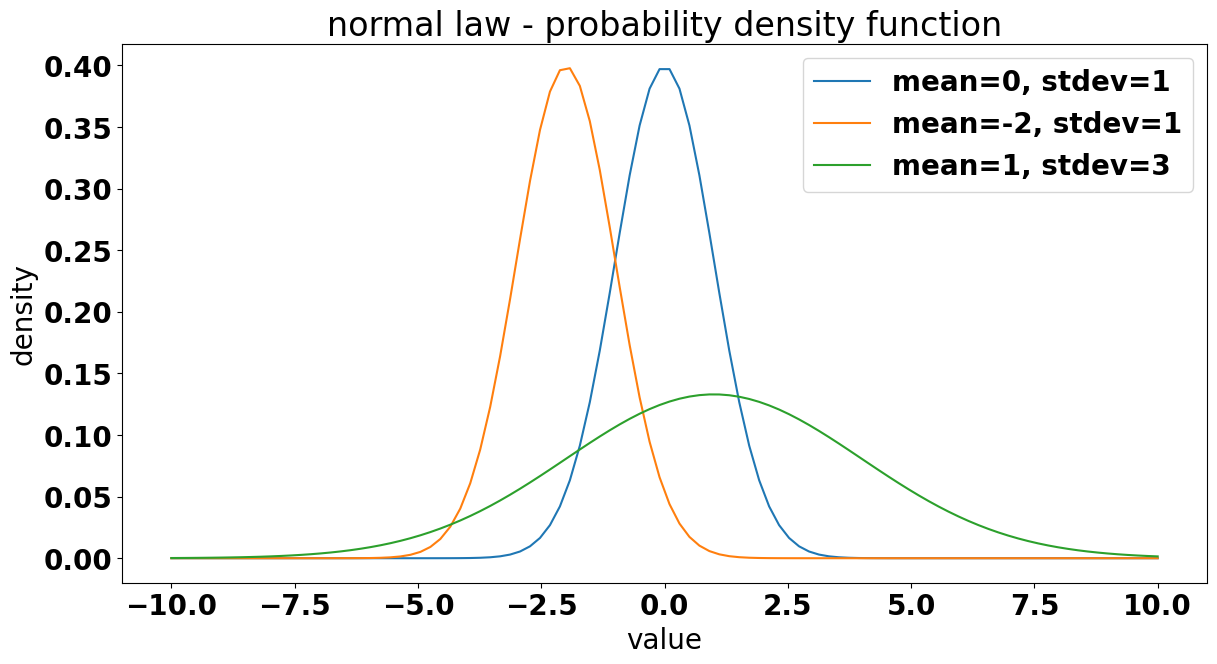

In [13]:
# Generate 100 equally separated points between -5 and 5,
x = np.linspace(-10, 10, 100)

fig, ax = plt.subplots(figsize=(14, 7))

a = sns.lineplot(
    x=x, y=stats.norm.pdf(x, loc=0 , scale=1),
    ax=ax, label="mean=0, stdev=1"
)
sns.lineplot(
    x=x, y=stats.norm.pdf(x, loc=-2, scale=1) ,
    ax=ax, label="mean=-2, stdev=1"
)
sns.lineplot(
    x=x, y=stats.norm.pdf(x, loc=1, scale=3) ,
    ax=ax, label="mean=1, stdev=3")

a.set(xlabel="value", ylabel="density")
a.set_title("normal law - probability density function")
ax.legend()

<br>
<br>

[Back to ToC](#toc)

## 1.2 t-test <a id='stats.2'></a>

[**Student's t-test**](https://en.wikipedia.org/wiki/Student%27s_t-test) is used to determine if the means of two samples (drawn from 2 sub-populations for instance) are significantly different.

It is a widely used test, with important but not overly complex assumptions:
 * Independence of data points.
 * The means of each sample should follow normal distributions.
 * *The two sample share the same variance* (there are different flavors of the t-test depending
   on that assumption).

<br>

**Example:** weight of mice of different genotypes and subjected to different diets.

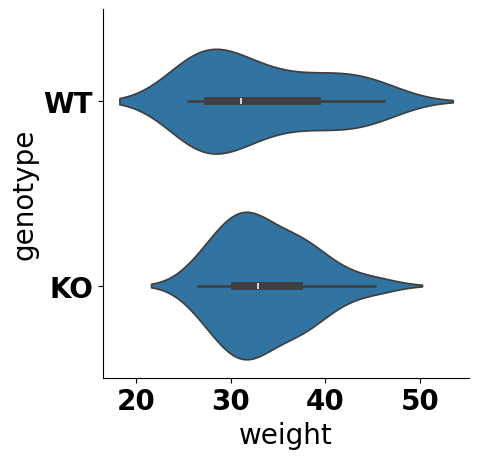

In [14]:
mice_data = pd.read_csv("data/mice_data.csv")
sns.catplot(x="weight", y="genotype", data=mice_data, kind="violin")

The t-test has a number of assumptions, mostly the normality of means of each group.

We can get an approximate idea of this with a pair of QQplots.

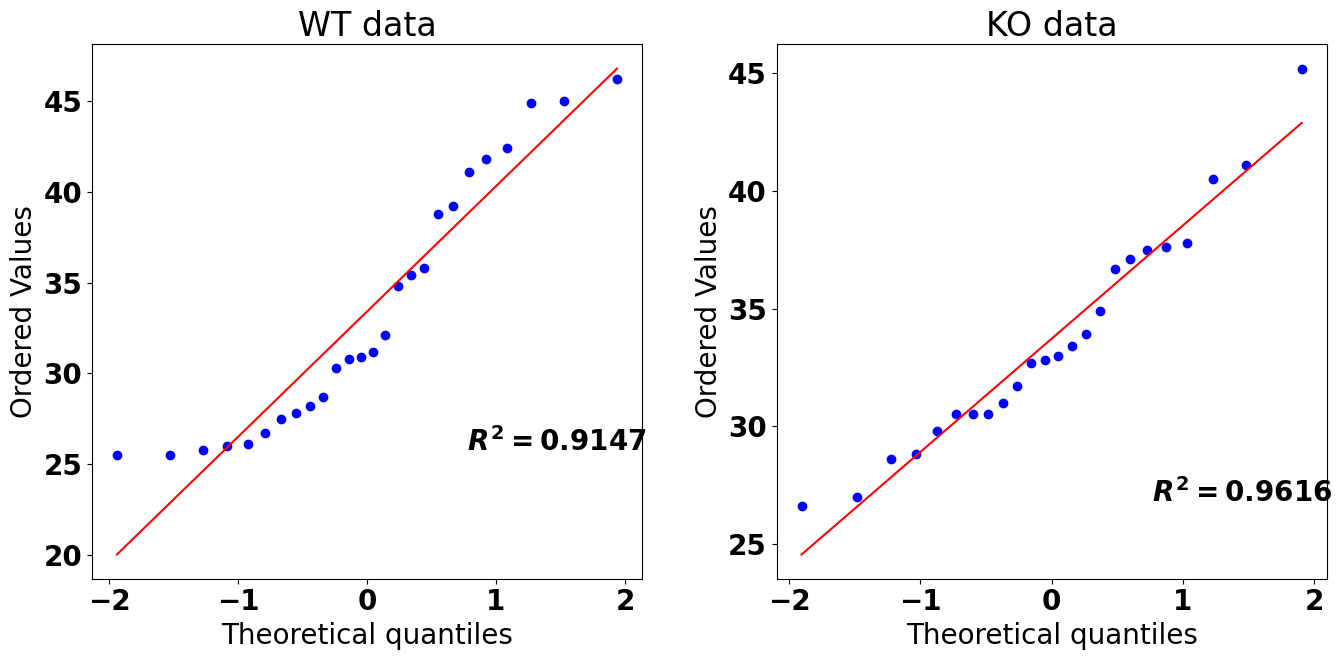

In [15]:
WT_data = mice_data["weight"][mice_data["genotype"] == "WT"]
KO_data = mice_data["weight"][mice_data["genotype"] == "KO"]

fig,ax = plt.subplots(1, 2, figsize=(14, 7))
stats.probplot(WT_data, dist="norm", plot=ax[0], rvalue=True)
ax[0].set_title("WT data")
stats.probplot(KO_data, dist="norm", plot=ax[1], rvalue=True)
ax[1].set_title("KO data")
fig.tight_layout()

And now for the t-test itself:

In [16]:
# Note: use equal_var=True if you have tested for variance equality.
tstat, pval = stats.ttest_ind(KO_data, WT_data, equal_var=False)

print("test statistic:", tstat)
print("p-value       :", pval)

test statistic: 0.18836850422505863
p-value       : 0.8514498629523398


<br>

<div class="alert alert-block alert-success">

### Micro-Exercise 1
* There is another column in the `mice_data` data-set : `diet`, which can take the values `"HFD"` and `"CHOW"`.
  Perform a t-test exactly as before, but splitting mice by their `diet` rather than their `genotype`.
    
<div>


<br>
<br>

[Back to ToC](#toc)

## 1.3 Statistical power calculations <a id='stats.3'></a>

Statistical **power** is the probability that a test correctly rejects the Null Hypothesis (if the alternative Hypothesis is true).

For some widely used tests, functions exist to let you automatically compute statistical power for a given effect size or sample size.

In [17]:
from statsmodels.stats.power import TTestIndPower

mean_difference = 1
standard_dev = 1
sample_size = 10

effect_size = mean_difference/standard_dev

P = TTestIndPower()
print('power:', P.power(effect_size=effect_size, nobs1=sample_size, ratio=1, alpha=0.05))

power: 0.5620066465861782


**Calculating statistical power can help inform our experimental design**. 

For example, how many observation per sample do we need if we want to detect a difference in mean of 1 with significance level (type I error) 0.01 and statistical power 0.80:

minimum sample size: 25.066708240006697


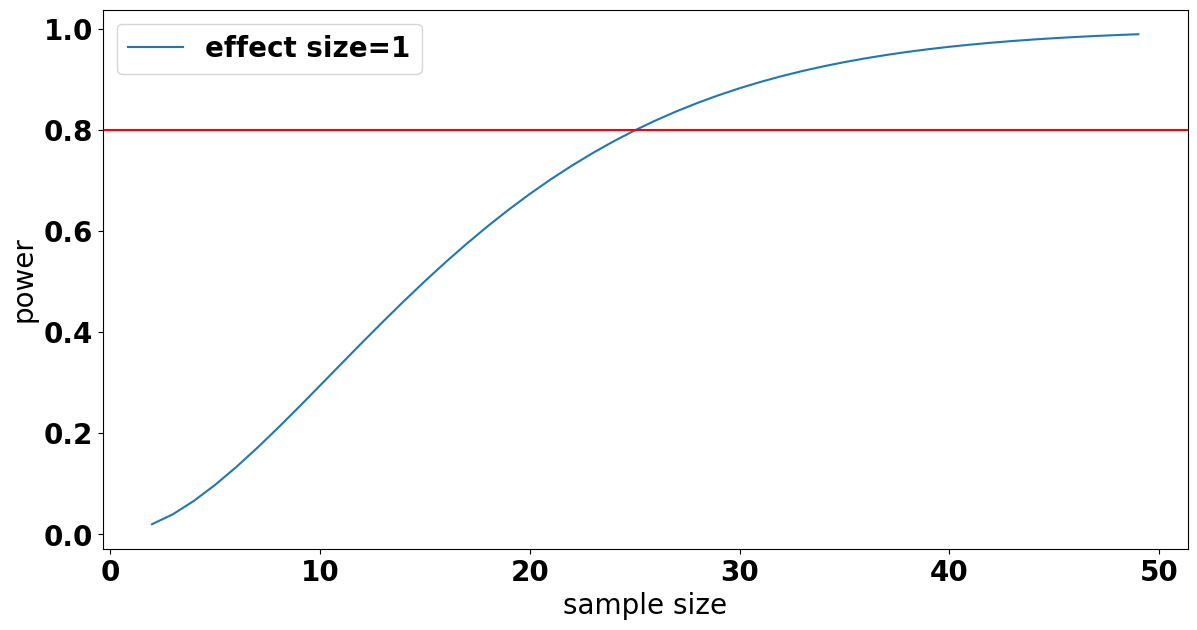

In [18]:
effect_size = 1
sig_threshold = 0.01
P = TTestIndPower()

powers = []
for sample_size in range(2, 50):
    powers.append(P.power(effect_size=effect_size, nobs1=sample_size, ratio=1, alpha=sig_threshold))

fig, ax = plt.subplots(figsize=(14, 7))
sns.lineplot(x=range(2, 50), y=powers, label="effect size=" + str(effect_size), ax=ax)
ax.axhline(0.8, color="r", linestyle="-")
ax.set(xlabel="sample size", ylabel="power")


# Or, directly:
print("minimum sample size:",
      P.solve_power(
          effect_size=effect_size,
          nobs1=None,
          ratio=1,
          alpha=sig_threshold,
          power=0.8
      )
)

Functions to compute power not only exists for t-test, but also for others such as Chi-square, Anova, F-test, Z-test.

See the [documentation](https://www.statsmodels.org/dev/stats.html#power-and-sample-size-calculations) for a lists and details.

<br>
<br>

[Back to ToC](#toc)

## 1.4 Multiple hypothesis testing <a id='stats.4'></a>

Recall the **definition of the p-value**: the probability of obtaining a test statistic at least as extreme as the one observed, **if the null hypothesis is true**

Thus, *even* if the p-value is, let's say, 0.04, there is still a 4% chance of obtaining such an extreme result **purely by chance**.

This is often acceptable if we only perform one test. However when **multiple tests** are performed, it was shown (by simulation), that even when there is no real effect some tests will turn out significant by chance.

> This is the definition of the $\alpha$ risk of type I error.

Of course, this has important implication for science and the relevance of our results.

![image.png](img/xkcd882.png)

> source: [xkcd](http://xkcd.com) (note: there are many relevant xkcd strips for everything related to stats/programming courses)

[Text(0.5, 0, 'number of tests'),
 Text(0, 0.5, 'probability of at least 1 test significant by chance')]

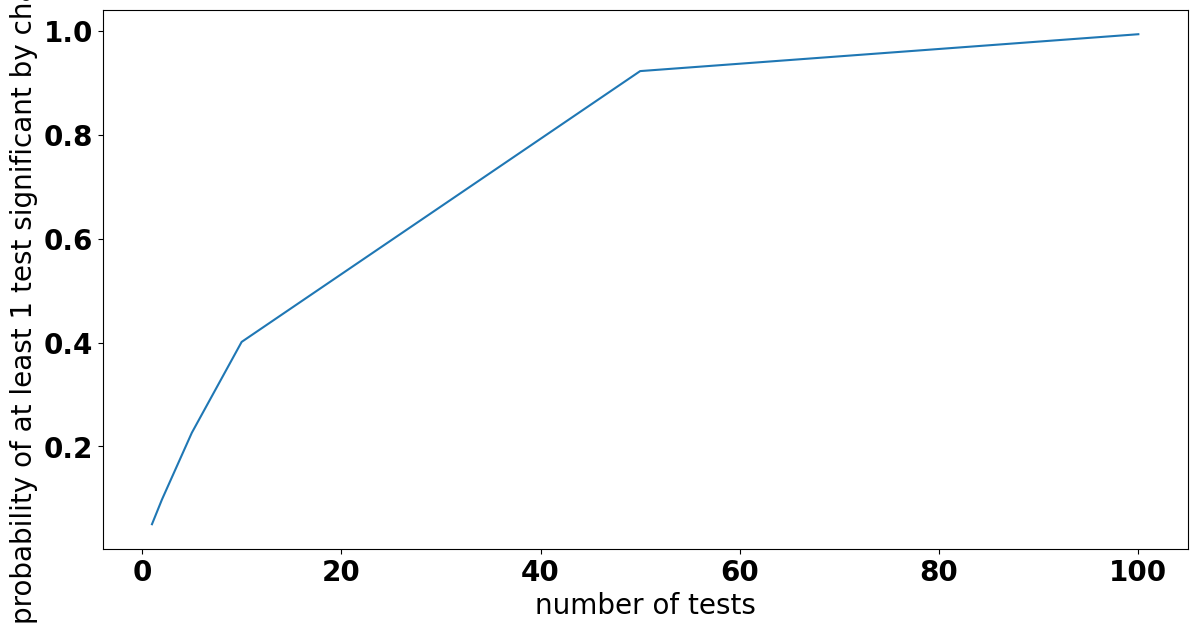

In [19]:
P = np.array([1, 2, 5, 10, 50, 100])
fig, ax = plt.subplots(figsize=(14, 7))
ax.plot(P, 1 - 0.95 ** P)
ax.set(xlabel="number of tests", ylabel="probability of at least 1 test significant by chance")



We need to change perspective.
Instead of trying to limit the false positive probability for *each* test, we focus on:
* The probability of obtaining **any** false positives (family-wise error rate, **FWER**).
* The proportion of false positives among all findings (false discovery rate, **FDR**).

> Controlling the FWER is often too stringent - limit type I errors, but get lots of type II errors. 

<br>

### The Bonferroni method for controlling the FWER
* Assume we are performing $N$ tests.
* To control the FWER at (e.g.) 0.05, only call variables with p-values below $0.05/N$ significant.

<br>

### The Benjamini-Hochberg method for controlling the FDR

- Assume we are performing $N$ tests.
- Intuition: for each p-value threshold $\alpha$, we can estimate the number of false discoveries by $\alpha N$.
- Compare this to the actual number of discoveries at the threshold - $N_\alpha$.
- Choose a p-value threshold $\alpha$ such that $\alpha N/N_\alpha$ is less than a desired threshold
  (e.g. 0.05) - this threshold would give an expected FDR of 0.05.
- Note that the FDR is truly a property of a *set* - in a set of genes with FDR = 0.05, we can expect
  around 5% to be false discoveries. However, we don't know *which* ones! It could be the most significant!
- Often, we want a gene-wise measure of significance (like the p-value).
- The q-value, or adjusted p-value, of a variable is the *smallest* FDR we have to accept in order to
  call that variable significant.
- For example, if the adjusted p-value is 0.2, we have to accept that if we want to call this variable
  (and consequently, all variables with lower p-values) significant, there will be approximately 20%
  false discoveries among them.

In python :

```python
from statsmodels.stats.multitest import multipletests

# Bonferroni
rejected, fwers, alphacSidak, alphacBonf = multipletests(pvals, alpha=0.05, method='bonferroni')

# BH procedure
rejected, fdrs, alphacSidak, alphacBonf = multipletests(pvals, alpha=0.05, method='fdr_bh')

# Note: many other methods are available -> help(multipletests)
```

* rejected : true for hypothesis that can be rejected for the given alpha.
* fwers|fdrs : p-values corrected for multiple tests.
* alphacSidak : corrected alpha for Sidak method.
* alphacBonf : corrected alpha for Bonferroni method.

<br>

**Example:**
* Imagine we perform 10'000 t-tests on 10'000 couple of random samples all taken from the exact same distribution:
  any **significant difference in mean value among these samples** (i.e. this is what the t-test is testing)
  **will be purely by chance** (and would lead us to wrongly reject the null hypothesis).

In [20]:
%%time
pvals = []  # A list where we will store the p-values of our t-tests.

N = 10000
mean_difference = 0 # no differences -> any detected difference is due to chance.
sample_size = 100
std=1

for i in range(N):
    t, pval_ttest = stats.ttest_ind(np.random.randn(sample_size) * std, 
                                    np.random.randn(sample_size) * std + mean_difference, equal_var=True)
    pvals.append(pval_ttest)
    
pvals = np.array(pvals)
# stats models proposes a function implementing numerous p-value correction methods
# https://www.statsmodels.org/dev/generated/statsmodels.stats.multitest.multipletests.html

from statsmodels.stats.multitest import multipletests

rejected, fwers, alphacSidak, alphacBonf = multipletests(pvals, alpha=0.05, method="bonferroni")
rejected, fdrs, alphacSidak, alphacBonf = multipletests(pvals, alpha=0.05, method="fdr_bh")

CPU times: user 8.34 s, sys: 15.7 ms, total: 8.36 s
Wall time: 8.38 s


Fraction of (spuriously) significant tests:
p-value: 0.0489
FWER   : 0.0
FDR    : 0.0


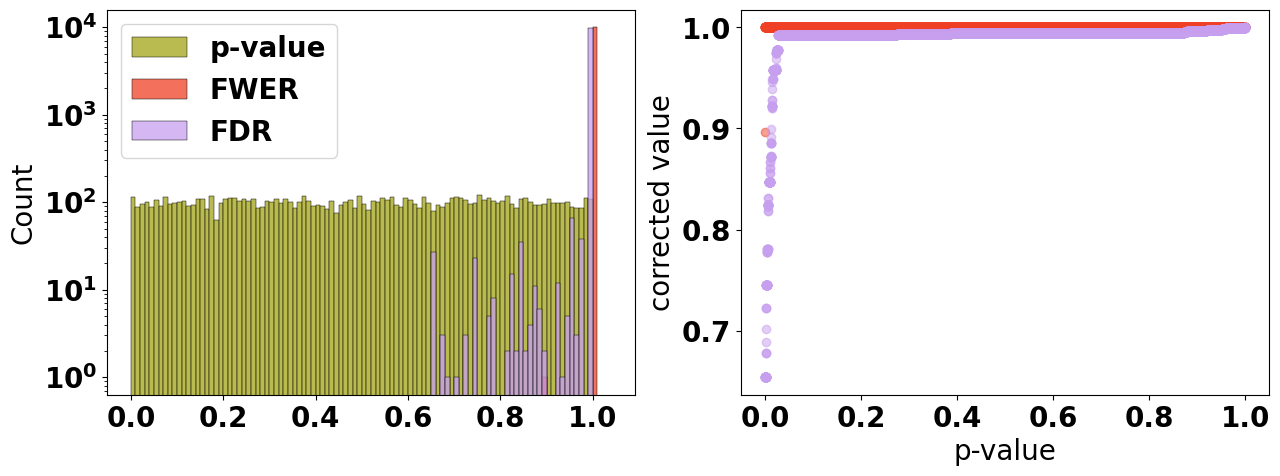

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(pvals, bins = np.arange(0, 1.05, 0.01), ax=ax[0], label="p-value", color="xkcd:vomit")
sns.histplot(fwers, bins = np.arange(0, 1.05, 0.01), ax=ax[0], label="FWER", color="xkcd:tomato")
sns.histplot(fdrs, bins = np.arange(0, 1.05, 0.01), ax=ax[0], label="FDR", color="xkcd:lavender")
ax[0].set_yscale("log")
ax[0].legend()

ax[1].scatter(pvals, fwers, label="FWER", c="xkcd:tomato", alpha=0.5)
ax[1].scatter(pvals, fdrs, label="FDR", c="xkcd:lavender", alpha=0.5)
ax[1].set_xlabel("p-value")
ax[1].set_ylabel("corrected value")

print("Fraction of (spuriously) significant tests:")
print("p-value:", sum(pvals<0.05)/N )
print("FWER   :", sum(fwers<0.05)/N )
print("FDR    :", sum(fdrs <0.05)/N )

* Now, imagine a different scenario where 100 out of the 10'000 tests should indeed show a significant difference (because the underlying distributions from where the random numbers are drawn are different). 

In [22]:
%%time
pvals = []

N = 10000 - 100
mean_difference = 0  # no differences -> any detected difference is due to chance.
sample_size = 100
std = 1

for i in range(N):
    t, pval_ttest = stats.ttest_ind(np.random.randn( sample_size ) * std, 
                                    np.random.randn( sample_size ) * std + mean_difference, equal_var=True)
    pvals.append(pval_ttest)

# Now we add the different ones:
mean_difference = 0.75
for i in range(100):
    t, pval_ttest = stats.ttest_ind(np.random.randn( sample_size ) * std, 
                                    np.random.randn( sample_size ) * std + mean_difference, equal_var=True)
    pvals.append(pval_ttest)
    
    
pvals = np.array(pvals)
# stats models proposes a function implementing numerous p-value correction methods
# https://www.statsmodels.org/dev/generated/statsmodels.stats.multitest.multipletests.html

from statsmodels.stats.multitest import multipletests

rejected, fwers, alphacSidak, alphacBonf = multipletests(pvals, alpha=0.05, method="bonferroni")
rejected, fdrs, alphacSidak, alphacBonf = multipletests(pvals, alpha=0.05, method="fdr_bh")

CPU times: user 8.35 s, sys: 0 ns, total: 8.35 s
Wall time: 8.35 s


<Axes: xlabel='PV', ylabel='Count'>

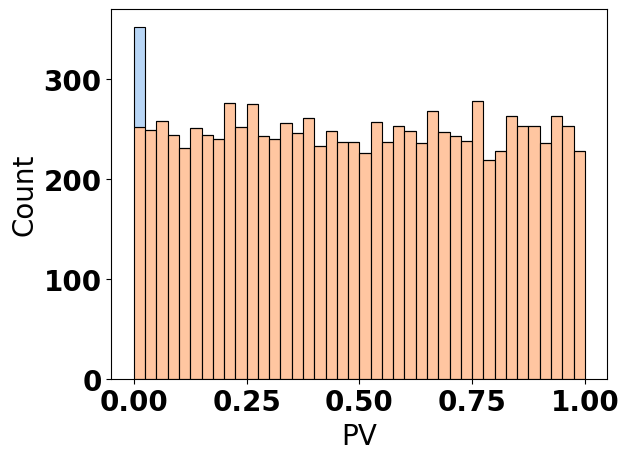

In [23]:
_df = pd.DataFrame({"PV": pvals, "D": N*[1] + 100 * [0]})
sns.histplot(
    data=_df, x="PV",
    hue="D", palette="pastel",
    multiple="stack", binwidth=0.025,
    legend=False
)

In [24]:
print('Number of significant tests:')
print('p-value:', sum(pvals<0.05))
print('FWER   :', sum(fwers<0.05))
print('FDR    :', sum(fdrs <0.05))
print()
print('Number of correctly significant tests (out of 100):')
print('p-value:', sum(pvals[-100:]<0.05) )
print('FWER   :', sum(fwers[-100:]<0.05) )
print('FDR    :', sum(fdrs[-100:] <0.05) )
print()
print('Number of spuriously significant tests (out of 9900):')
print('p-value:', sum(pvals[:-100]<0.05) )
print('FWER   :', sum(fwers[:-100]<0.05) )
print('FDR    :', sum(fdrs[:-100] <0.05) )

print("Observed False Discovery Rate:")
print('p-value: {:.3f}'.format(sum(pvals[:-100]<0.05)/sum(pvals<0.05)))
print('FWER   : {:.3f}'.format(sum(fwers[:-100]<0.05)/sum(fwers<0.05)))
print('FDR    : {:.3f}'.format(sum(fdrs[:-100] <0.05)/sum(fdrs<0.05)))

Number of significant tests:
p-value: 601
FWER   : 75
FDR    : 100

Number of correctly significant tests (out of 100):
p-value: 100
FWER   : 75
FDR    : 95

Number of spuriously significant tests (out of 9900):
p-value: 501
FWER   : 0
FDR    : 5
Observed False Discovery Rate:
p-value: 0.834
FWER   : 0.000
FDR    : 0.050


<br>
<br>

[Back to ToC](#toc)

## 1.5 Fisher's exact test and the Chi-square test <a id='stats.5'></a>

* These two tests have for object the association between 2 categorical variables.
* Their **null hypothesis** is the absence of association between the two variable.

**Fisher's exact test**, as its name entails, computes a p-value which is exact, even for very low sample sizes. However it becomes computationally complex to compute as the data set size increases or number of categories gets higher.

The **Chi-square test**, in contrast, uses an approximation of the exact p-value which is only valid when samples are big enough. However, it scales well to larger samples sizes and number of categories.


Both tests start from a **contingency table**.

Here we are going to use as example the historical [Lady tasting tea](https://en.wikipedia.org/wiki/Lady_tasting_tea).

|  | detected as milk before | detected as milk after | marginal sums |
|---|---|---|---|
| **milk before** | 3 | 1 | **4** |
| **milk after** | 1 | 3 | **4** |
| **marginal sums**  | **4** | **4** | **8** |

In our experiment, the lady was able to correctly identify 6 out of 8 cups.





In [25]:
# Create a contingency table with the results from the tea tasting.
table = [[3,1], [1,3]]

# Fisher's exact test.
oddsratio, pvalue = stats.fisher_exact(table)
print("Fisher's exact test")
print("\todds ratio:", oddsratio)
print("\tp-value:", pvalue)

# Chi-square.
chi2, pval, df, expected = stats.chi2_contingency(table, correction=False)
print("Chi-square test")
print("\tchi2:", chi2)
print("\tp-value:", pval)

Fisher's exact test
	odds ratio: 9.0
	p-value: 0.48571428571428565
Chi-square test
	chi2: 2.0
	p-value: 0.15729920705028105


In [26]:
expected

array([[2., 2.],
       [2., 2.]])

As you can see above, the p-values between Fisher's and the Chi-square tests are quite different.

> Note that here we use `correction=False` as by default scipy implementation uses [Yates's correction](https://en.wikipedia.org/wiki/Yates%27s_correction_for_continuity), which is useful when the numbers are low. Try the same lines with the correction to see the difference.



Let's imagine now that we have many cups and a very patient lady so that the contingency table looks like this:

|  | detected as milk before | detected as milk after | marginal sums |
|---|---|---|---|
| **milk before** | 30 | 10 | **40** |
| **milk after** | 18 | 22 | **40** |
| **marginal sums**  | **48** | **32** | **80** |



In [27]:
table = [[30,10], [18,22]]

oddsratio , pvalue = stats.fisher_exact(table)
print("Fisher's exact test")
print('\todds ratio:', oddsratio)
print('\tp-value:', pvalue)

chi2,pval , df, expected = stats.chi2_contingency(table, correction=False)
print("Chi-square test")
print('\tchi2:', chi2)
print('\tp-value:', pval)

Fisher's exact test
	odds ratio: 3.6666666666666665
	p-value: 0.01150621201656047
Chi-square test
	chi2: 7.5
	p-value: 0.0061698993205441645


You can see, with a larger dataset, the p-value of the Chi-square test is closer to that of Fisher's exact test (because the approximation made by the Chi-square tests is better with larger datasets).


<br>
<br>

<div class="alert alert-block alert-success">

## Exercise 3.1

Exercises are located in the dedicated notebook `exercises_course1.ipynb`.

</div>


<br>
<br>

[Back to ToC](#toc)

## 1.6 1-way anova <a id='stats.6'></a>

The **ANOVA**, or **AN**alyse **O**f **VA**riance, stands maybe among the most used (and abused) type of statistical tests to date.

The anova is used to analyze the differences among group means in a sample. 
In particular, we are going to concentrate here on the 1-way ANOVA, which evaluates the difference in means of a numerical variable across groups formed by another (single) variable.

In this sense, it is a generalization of the t-test which is limited to 2 groups only (in fact, the 1-way anova and t-test are quivalent when there are only 2 groups).

**Anova assumptions**:
* Subpopulation distributions are normal.
* Samples have equal variances.
* Observations are independent from one another.

**Test hypothesis**: 
Given $m$ groups of mean $\bar{x}_{1...m}$, each containing $n_i$ observations (for a total of $n$):
 * **Null hypothesis**: $H_0 : \bar{x}_1 = \bar{x}_2 = ... = \bar{x}_m$
 * **Alternative hypothesis**: at least one of these means differ from the others.
 
The anova relies on the idea that if the mean varies between the different group then the overall variance of all samples should be significantly greater than the variance within each group (hence the name).

<br>

**Example:**
* In the 1880 Swiss census data: is there difference in the proportion of the number of 60+ years old depending on the main language? 

In [28]:
# Here playing with the whole dataset is a bit silly, because we have the whole population.
# So let's imagine we only went and counted this fraction in 20 communes per language.

dfFractions = pd.read_csv("data/census1880_fractions.csv")
dfFractionsSample = dfFractions.groupby("majority language", group_keys=False).apply(lambda x: x.sample(20))
dfFractionsSample["majority language"].value_counts()

/tmp/ipykernel_1099702/3697658041.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dfFractionsSample = dfFractions.groupby("majority language", group_keys=False).apply(lambda x: x.sample(20))


majority language
French speakers      20
German speakers      20
Italian speakers     20
Romanche speakers    20
Name: count, dtype: int64

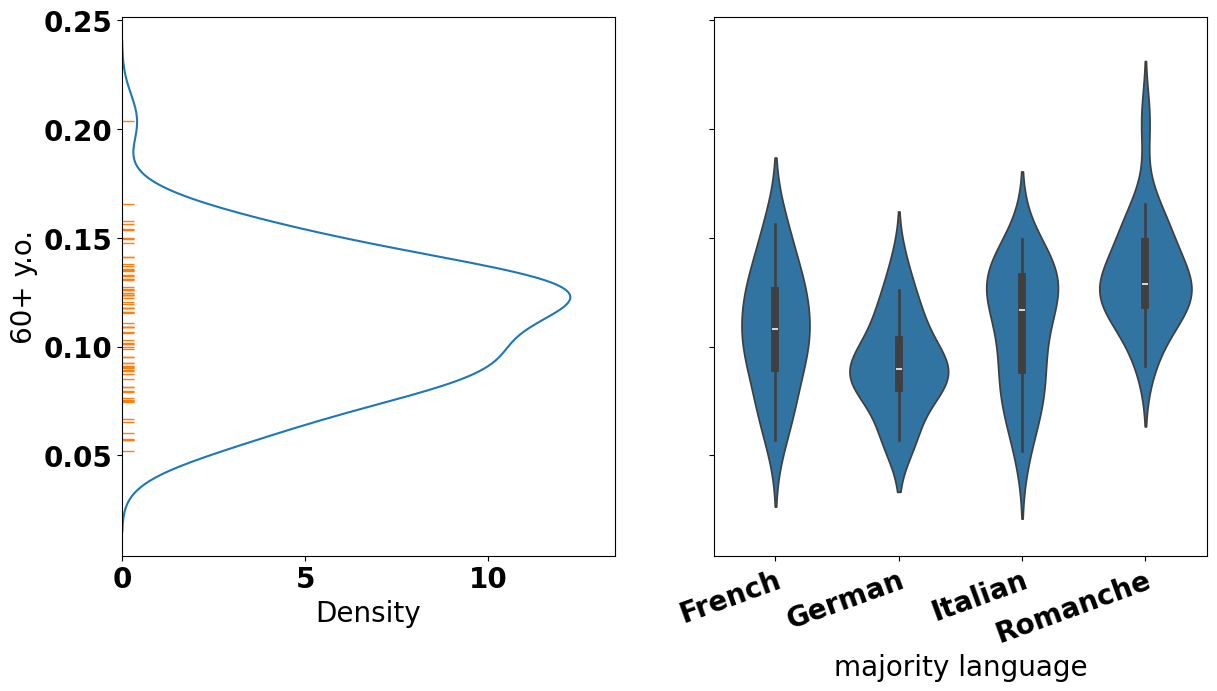

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(14,7), sharey=True)
sns.kdeplot(data=dfFractionsSample, y="60+ y.o.", ax=axes[0])
sns.rugplot(data=dfFractionsSample, y="60+ y.o.", ax=axes[0])

sns.violinplot(data=dfFractionsSample, x="majority language", y="60+ y.o." , ax=axes[1])
_ = axes[1].set_xticks(range(4))
_ = axes[1].set_xticklabels( map(lambda x:x.partition(" ")[0] , dfFractionsSample["majority language"].unique()) , 
                            rotation = 20, rotation_mode='anchor',ha='right')
# The last line removes the "speaker" at the end of x-axis labels.

In [30]:
# Nice trick to aggregate this data as a set of lists.
aggregated60fraction = dfFractionsSample.groupby('majority language')['60+ y.o.'].agg(list)
aggregated60fraction

majority language
French speakers      [0.1238532110091743, 0.1411042944785276, 0.109...
German speakers      [0.1091035441278665, 0.0602836879432624, 0.095...
Italian speakers     [0.0923478544623919, 0.1158301158301158, 0.065...
Romanche speakers    [0.0909090909090909, 0.120507399577167, 0.1177...
Name: 60+ y.o., dtype: object

In [31]:
Fstat, pval = stats.f_oneway(*aggregated60fraction)
# equivalent to stats.f_oneway( aggregated60fraction[0] , aggregated60fraction[1] , ... )

print("automated 1-way anova / F-test:")
print("F-stat :",Fstat)
print("p-value:",pval)


automated 1-way anova / F-test:
F-stat : 8.620601607245517
p-value: 5.3819442256612185e-05


In [32]:
# With this, it can be nice to report the mean and standard deviation of each group.
dfFractionsSample.groupby('majority language')['60+ y.o.'].agg(['mean','std'])

,mean,std
majority language,,
French speakers,0.108299,0.027907
German speakers,0.092016,0.021836
Italian speakers,0.108701,0.028205
Romanche speakers,0.133233,0.025086


Note that the ANOVA only tests if there is at least one significant difference between groups.

If you want to test for each differences, then **after an ANOVA**, we recommend [Tukey's honestly significant difference](https://docs.scipy.org/doc/scipy-1.8.1/reference/generated/scipy.stats.tukey_hsd.html)

In [33]:
res = stats.tukey_hsd(*aggregated60fraction)
print(res)

Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.016     0.201    -0.005     0.038
 (0 - 2)     -0.000     1.000    -0.022     0.021
 (0 - 3)     -0.025     0.016    -0.046    -0.003
 (1 - 0)     -0.016     0.201    -0.038     0.005
 (1 - 2)     -0.017     0.183    -0.038     0.005
 (1 - 3)     -0.041     0.000    -0.063    -0.020
 (2 - 0)      0.000     1.000    -0.021     0.022
 (2 - 1)      0.017     0.183    -0.005     0.038
 (2 - 3)     -0.025     0.019    -0.046    -0.003
 (3 - 0)      0.025     0.016     0.003     0.046
 (3 - 1)      0.041     0.000     0.020     0.063
 (3 - 2)      0.025     0.019     0.003     0.046



In [34]:
# The categories Ids correspond to the order in which the lists were provided:
for i, n in enumerate(aggregated60fraction.index):
    print(i,n)

0 French speakers
1 German speakers
2 Italian speakers
3 Romanche speakers


<Axes: >

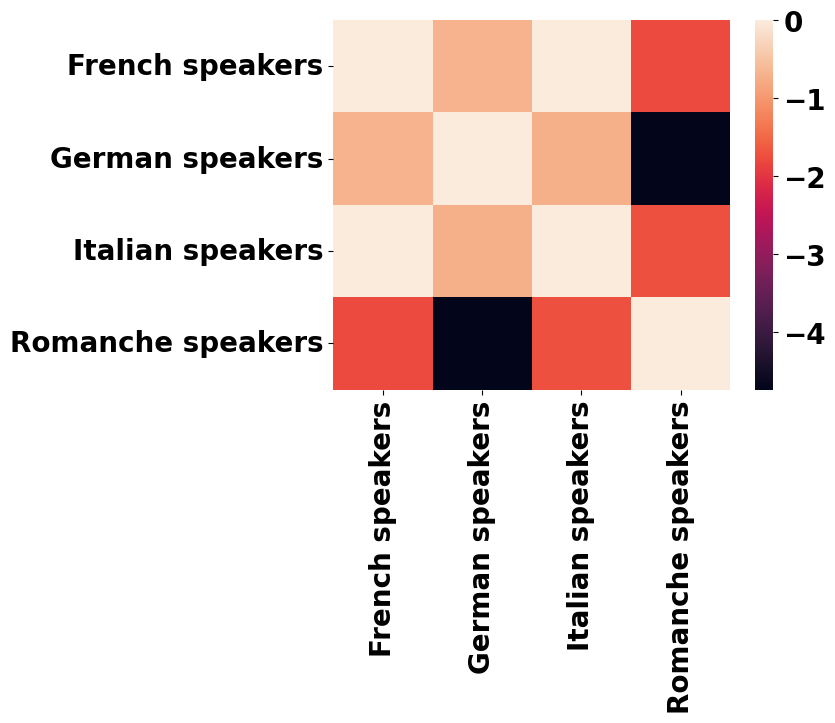

In [35]:
# We can visualize the results as a p-value heatmap.
sns.heatmap( np.log10( res.pvalue ), 
            xticklabels = aggregated60fraction.index , 
            yticklabels = aggregated60fraction.index  )

> Of course, there exists many other tests implemented in `scipy.stats` (as well as other libraries). Here is a little [cheat-sheet](https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/) to help you explore this. 

> Scipy.stats documentation is also great!

<br>
<br>

[Back to ToC](#toc)

# 2. Correlation and linear regression <a id='reg'></a>
-----------------------------------------------

## 2.1 Correlation <a id='reg.1'></a>

**Correlation** is a measure of the amount of relatedness between two measured variables. It comes in several flavours :
 * **Pearson's linear correlation** coefficient: for linear relationship only: **`stats.pearsonr(x,y)`**
 * **Spearman's rank correlation** coefficient: accepts non linear, but "monotonic only":
   **`stats.spearmanr(x,y)`**
 * **Kendall's Tau**: relies on value order relation only, and is less influenced by the scale than
   the two others: **`stats.kendalltau(x,y)`**



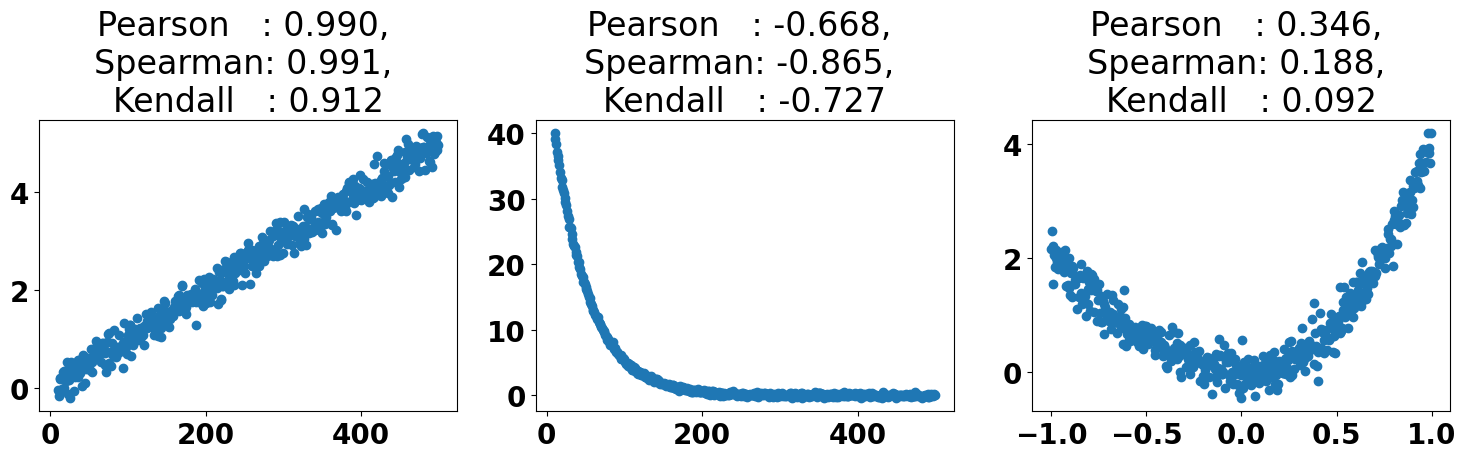

In [36]:
sigma=1./5

linear=[[u,(u)/100+sigma*np.random.randn()] for u in range(10,500)]
monotonic=[[u,50*(0.8**(u/10))+sigma*np.random.randn()] for u in range(10,500)]

non_monotonic=[[u,(u)**3+3*u**2+sigma*np.random.randn()] for u in np.arange(-1,1,1./250)]

together=[linear,monotonic,non_monotonic]
fig, ax = plt.subplots(1,3,figsize=(15,5))
for i in range(3):
    x=[u[0] for u in together[i]]
    y=[u[1] for u in together[i]]
    ax[i].scatter(x,y)
    ax[i].set_title('Pearson   : {0:.3f}, \nSpearman: {1:.3f}, \nKendall   : {2:.3f}'.format(
                                    stats.pearsonr(x,y)[0],##just like that
                                    stats.spearmanr(x,y)[0],
                                    stats.kendalltau(x,y)[0]))
fig.tight_layout()    
plt.show()


[back to toc](#toc)

<br>

## 2.2 Regression <a id='reg.2'></a>

Performing regression (linear or otherwise) is possible with `scipy`, but it is not the best module for this task.

`statsmodels` offers much nicer options and statistical reports. 

<!--
Additionally, this is a great opportunity to see together how to install a library. 

1. Go to [https://www.statsmodels.org](https://www.statsmodels.org).
2. Click on the install page.
3. Find the instruction for installation with Anaconda.
4. Type the command in either a terminal (mac, linux) or in the anaconda-prompt (windows).
-->

<br>

Let's load our data using pandas:

In [37]:
df_diabetes = pd.read_table("data/diabetes.csv", sep=",")

# Rename columns to replace spaces by underscore
df_diabetes.rename( columns = lambda x : x.replace(" ","_") , inplace=True)
df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease_progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


<Axes: xlabel='bmi', ylabel='disease_progression'>

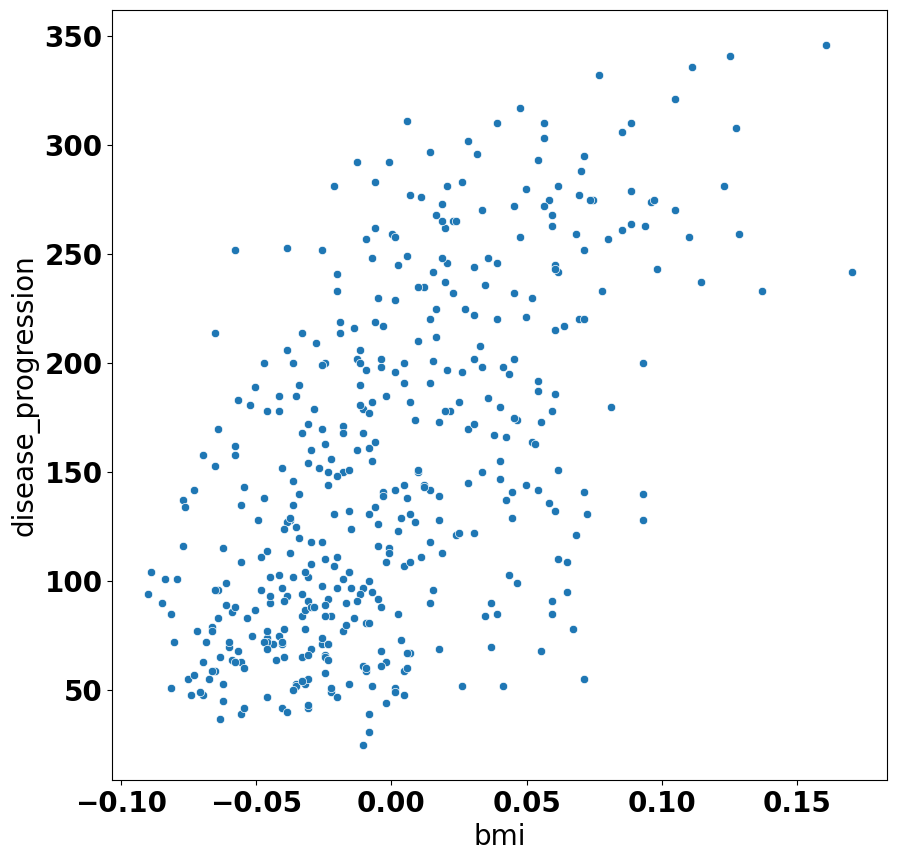

In [38]:
x = df_diabetes["bmi"]                  # Covariable bmi.
y = df_diabetes["disease_progression"]  # Response variable disease progression.

fig, ax = plt.subplots(figsize=(10, 10))  # Setup graphical windows.
sns.scatterplot(x=x, y=y)                 # Plot x versus y.

In [39]:
stats.pearsonr(df_diabetes["bmi"], df_diabetes["disease_progression"])

PearsonRResult(statistic=np.float64(0.5864501344746887), pvalue=np.float64(3.4660064451669974e-42))

In [40]:
# We'll be using the statsmodel package, which computes a lot of cool metrics for you.
import statsmodels
import statsmodels.formula.api as smf

model = smf.ols("disease_progression ~ bmi" , data=df_diabetes)

## Alternative syntax: 
# import statsmodels.api as sm
# X = sm.add_constant(x) # Adding a intercept to the model.
# model = sm.OLS(y, X)   # Defining an Ordinary Least Square variable.

results = model.fit()  # Fitting the model
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     disease_progression   R-squared:                       0.344
Model:                             OLS   Adj. R-squared:                  0.342
Method:                  Least Squares   F-statistic:                     230.7
Date:                 Thu, 21 Aug 2025   Prob (F-statistic):           3.47e-42
Time:                         13:08:40   Log-Likelihood:                -2454.0
No. Observations:                  442   AIC:                             4912.
Df Residuals:                      440   BIC:                             4920.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.974     51.16

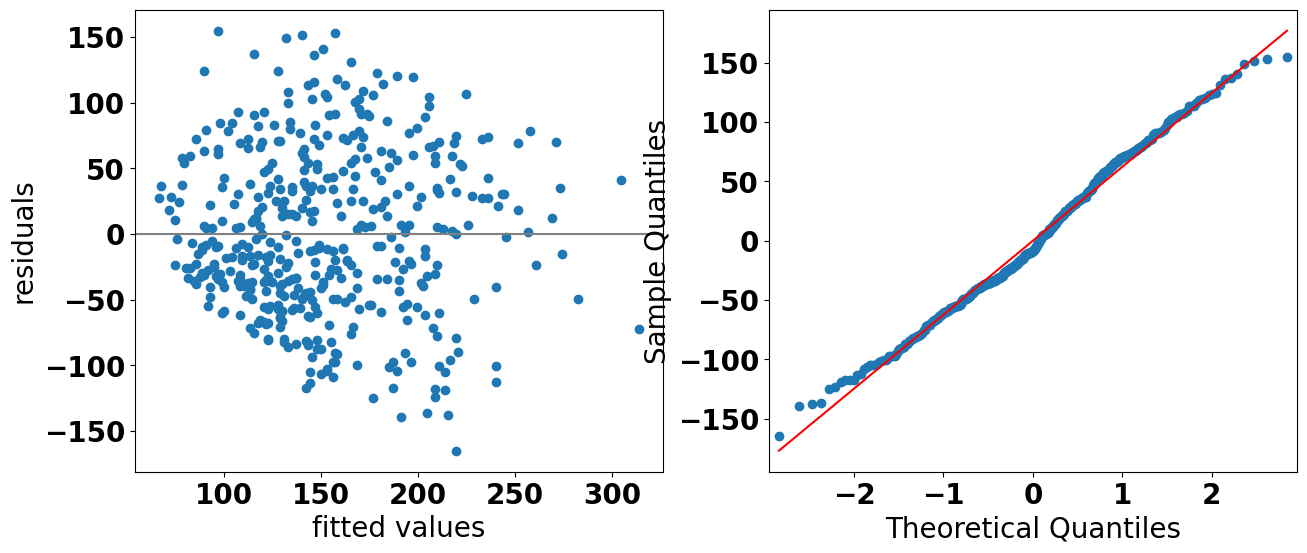

In [41]:
# Diagnostic plots:
from statsmodels.graphics.gofplots import qqplot

fig, axes = plt.subplots(1, 2, figsize = (15, 6))

# Plotting residuals (error of the model) vs. fitted values (prediction fo the model)
# helps determine homosedascticity and sphericity of errors:
# the points should show about the same spread all along the x axis, and be centered around 0.
axes[0].scatter( results.fittedvalues , results.resid )
axes[0].axhline(0.0, color="grey")
axes[0].set_xlabel("fitted values")
axes[0].set_ylabel("residuals")

# The QQplot (quantile-quantile plot) is  great plot to assess normality of the
# model's residuals. Basically points should stay close to the diagonal line if
# they follow something close to a normal distribution.
qqplot(results.resid, ax=axes[1], line="s") 
plt.show()


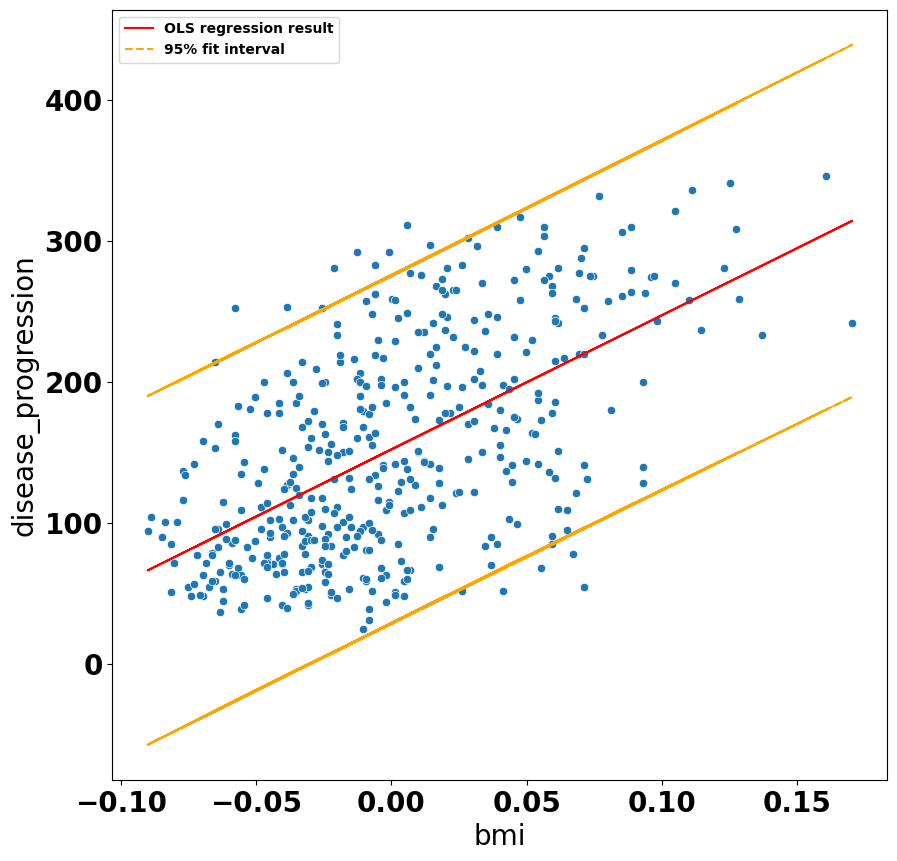

In [42]:
# Plotting the fit.
from statsmodels.sandbox.regression.predstd import wls_prediction_std

# We obtain the predicted values for our model, as well as their 95% intervals.
prstd, iv_l, iv_u = wls_prediction_std(results) 

fig, ax = plt.subplots(figsize=(10,10))

#ax.plot(x, y, 'o', label="data")
sns.scatterplot(x=x,y=y) # plot x versus y
ax.plot(x, results.fittedvalues, "r", label="OLS regression result")
ax.plot(x, iv_u, color="orange",linestyle="--" , label="95% fit interval")
ax.plot(x, iv_l, color="orange",linestyle="--")
ax.legend(loc="best", fontsize=10)
#plt.yscale('log')

This is a simple ordinary least square linear regression with a single covariable, 
but stats models is able to handle much more complex models such as [GLMs](https://www.statsmodels.org/stable/glm.html) , [time series analysis](https://www.statsmodels.org/stable/tsa.html), [survival analysis](https://www.statsmodels.org/stable/duration.html), ...

<br>
<br>

<div class="alert alert-block alert-success">

## Exercise 3.2 - Free-form exercise

Exercises are located in the dedicated notebook `exercises_course1.ipynb`.

</div>


[Back to ToC](#toc)